# `MNIST Dataset Description`
```markdown

The MNIST dataset is a well-known and widely used dataset in the machine learning community, particularly for tasks involving image classification. It consists of 70,000 grayscale images of handwritten digits, each 28 pixels by 28 pixels in size, representing a single digit from 0 through 9.

- **Total Images**: 70,000
- **Image Size**: 28x28 pixels
- **Digit Range**: 0-9

The dataset is divided into two parts:
- **Training Set**: 60,000 images
- **Test Set**: 10,000 images


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 


The MNIST dataset was created by NIST and has been widely used in research and academic settings for testing and evaluating machine learning models.

## Use Cases and Applications

The MNIST dataset is well-suited for testing machine learning models for image classification tasks, particularly those involving handwritten digits. By training a machine learning model on the MNIST dataset, we can build a system that is able to recognize handwritten digits from images. This can be useful in a variety of applications, such as:

- Automating the process of transcribing handwritten documents
- Building a system to recognize digits in financial documents

Additionally, the small size of the images in the MNIST dataset makes it easy to train and evaluate machine learning models, making it a valuable resource for researchers and practitioners working on image classification tasks.
```

## **Dataset Loading**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [123]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## `Converting numpy array to image `

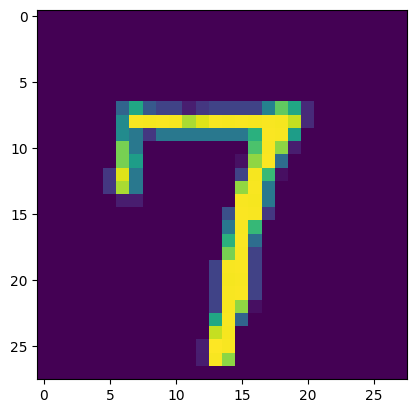

In [124]:
num = np.array(train.iloc[6, 1:]).reshape(28,28)
plt.imshow(num)
plt.show()

### Image has generally two classifications on color 1. RGB and 2. GrayScale and in each classification pixel can choose values between 0-255 .
### GrayScale has one channel and RGB has 3 channels so RGB has 28 X 28 X 3  and GrayScale has 28 X 28 .

In [125]:
arr = train.iloc[6, 1:]
max(arr)

255

In [126]:
min(arr)

0

In [127]:
x = np.array(train)
y = np.array(test)

x_train = x[: , 1:]
y_train = x[: , 0:1]

x_test = y


In [128]:
x_train.shape

(42000, 784)

In [129]:
y_train.shape

(42000, 1)

#### **For Considering all types of handwritten numbers we need to use ImageDataGenerator from keras** 

In [130]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### $For$ $Applying$ $the$ $below$ $ImageDataGenerator$ $we$ $have$ $to$ $make$ $shape$ $in$ $following$ $format$

In [131]:
x_train = x_train.reshape(-1,28,28,1)

In [132]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    width_shift_range = 0.1
)


In [133]:
datagen.fit(x_train)

In [134]:
x_train.shape

(42000, 28, 28, 1)

In [135]:
x_train = x_train.reshape(-1,784)

In [136]:
x_train.shape

(42000, 784)

In [137]:
y_train.shape

(42000, 1)

### `Implementing KNN Algorithm to this model for Classification problem`

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

c:\Users\Satyam\Desktop\Data_Science\satyam\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [142]:
x_test.shape

(28000, 784)

In [144]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
int(knn.predict(x_test[35,:].reshape(1,-1)))

C:\Users\Satyam\AppData\Local\Temp\ipykernel_31524\940036563.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(x_test[35,:].reshape(1,-1)))


2

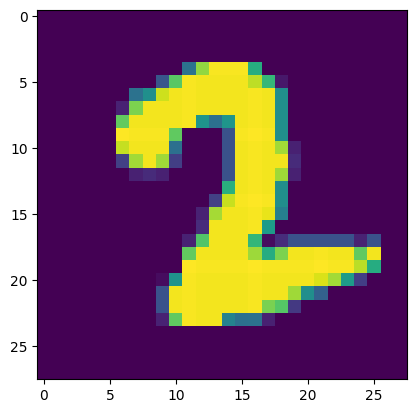

In [158]:
num = np.array(test.iloc[35, :]).reshape(28,28)
plt.imshow(num)
plt.show()